In [2]:
import pandas as pd
import numpy as np

# Load the data from the provided Excel file
file_path = '/Users/touqeergill/Desktop/2. DMPS (2010-2022).xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
print(data.head())
print(data.columns)

# Extracting Dp values from the column headers
Dp = np.array([float(x) for x in data.columns[1:]])

# Initializing arrays for dDp and Ni
dDp = np.zeros(len(Dp))
Ni = np.zeros((len(data), len(Dp)))

# Calculating dDp for each Dp interval
dDp[1:-1] = np.sqrt(Dp[2:] * Dp[1:-1]) - np.sqrt(Dp[:-2] * Dp[1:-1])

# Iterating through each row in the data frame to calculate Ni for each time point
for index, row in data.iterrows():
    dNdlogDp = row[1:].values
    Ni[index, 1:-1] = np.log10(np.exp(1)) * dDp[1:-1] / Dp[1:-1] * dNdlogDp[1:-1]

# Creating a new DataFrame to store Ni values
Ni_df = pd.DataFrame(Ni, columns=data.columns[1:], index=data.index)
Ni_df.insert(0, "datetime", data["datetime"])  # Adding the datetime column back for reference

# Displaying the first few rows of the new DataFrame with Ni values
print(Ni_df.head())

# Saving the Ni DataFrame to an Excel file
output_file_path = '/Users/touqeergill/Desktop/MajorFileextract.xlsx'
Ni_df.to_excel(output_file_path, index=False)

print(output_file_path)  # This will print the file path where the Excel file is saved

                 datetime  3.00E-09  3.61E-09  4.34E-09  5.22E-09   6.28E-09  \
0 2010-01-01 00:00:00.000       0.0       0.0       0.0       0.0   0.000000   
1 2010-01-01 00:10:11.436       0.0       0.0       0.0       0.0   0.000000   
2 2010-01-01 00:20:22.871       0.0       0.0       0.0       0.0   0.000000   
3 2010-01-01 00:30:34.307       0.0       0.0       0.0       0.0  98.056671   
4 2010-01-01 00:40:45.742       0.0       0.0       0.0       0.0   0.000000   

     7.56E-09    9.10E-09    1.09E-08    1.32E-08  ...   2.72E-07   3.14E-07  \
0   88.902717   84.724802  161.060840  285.251770  ...  382.18088  300.96635   
1    0.000000   86.053457    0.000000  500.064110  ...  400.38053  316.98834   
2    0.000000  171.007740  161.422680  214.437920  ...  370.57372  286.68957   
3  176.485490  257.862240  161.455040  131.576700  ...  385.70258  305.09723   
4    0.000000   85.512988   80.844446   65.499133  ...  351.23873  295.19723   

    3.63E-07   4.19E-07   4.85E-07   5

In [3]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/MajorFileextract.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


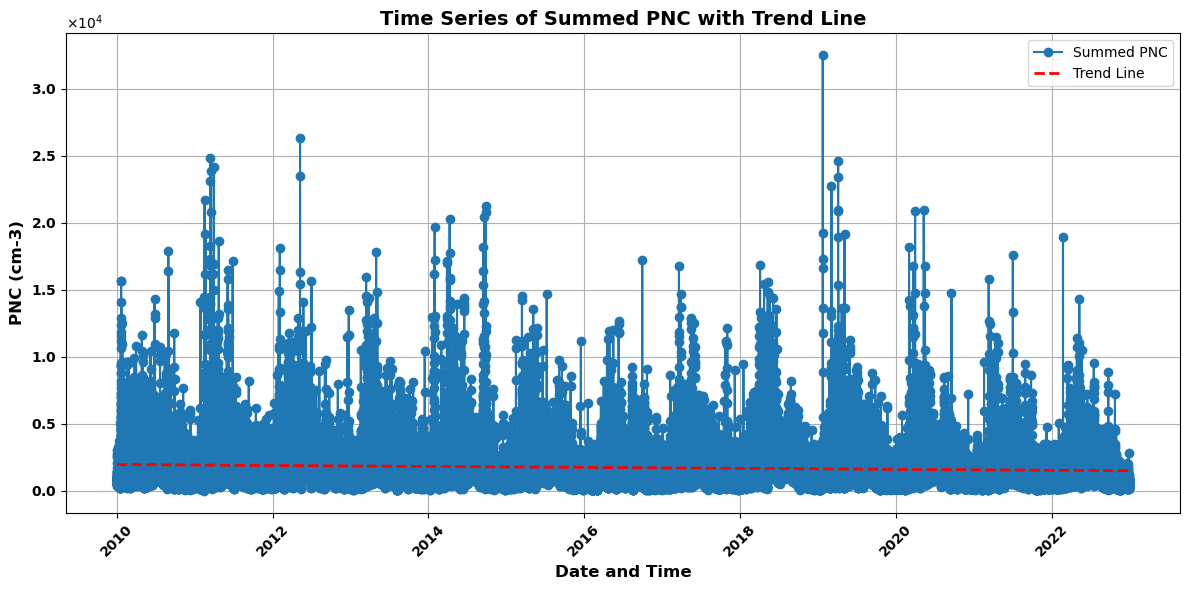

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/Users/touqeergill/Desktop/Hourly_Averages(PNC).xlsx'
data = pd.read_excel(file_path)

# Sum the values from columns B to AM for each row
data['Sum_PNC'] = data.iloc[:, 1:40].sum(axis=1)  # Columns B to AM are at index 1 to 39

# Convert the 'Date and Time' column to datetime if not already
data['datetime'] = pd.to_datetime(data['datetime'])

# Convert datetime to numerical values for regression
data['timestamp'] = data['datetime'].map(pd.Timestamp.timestamp)

# Perform linear regression (1st degree polynomial fit)
slope, intercept = np.polyfit(data['timestamp'], data['Sum_PNC'], 1)
trend_line = slope * data['timestamp'] + intercept

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Sum_PNC'], marker='o', linestyle='-', label='Summed PNC')
plt.plot(data['datetime'], trend_line, color='red', linestyle='--', linewidth=2, label='Trend Line')

plt.title('Time Series of Summed PNC with Trend Line', fontweight='bold', fontsize=14)
plt.xlabel('Date and Time', fontweight='bold', fontsize=12)
plt.ylabel('PNC (cm-3)', fontweight='bold', fontsize=12)
plt.grid(True)

# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Make x and y ticks bold and more prominent
plt.xticks(fontweight='bold', fontsize=10, rotation=45)
plt.yticks(fontweight='bold', fontsize=10)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/2. DMPS (2010-2022).xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


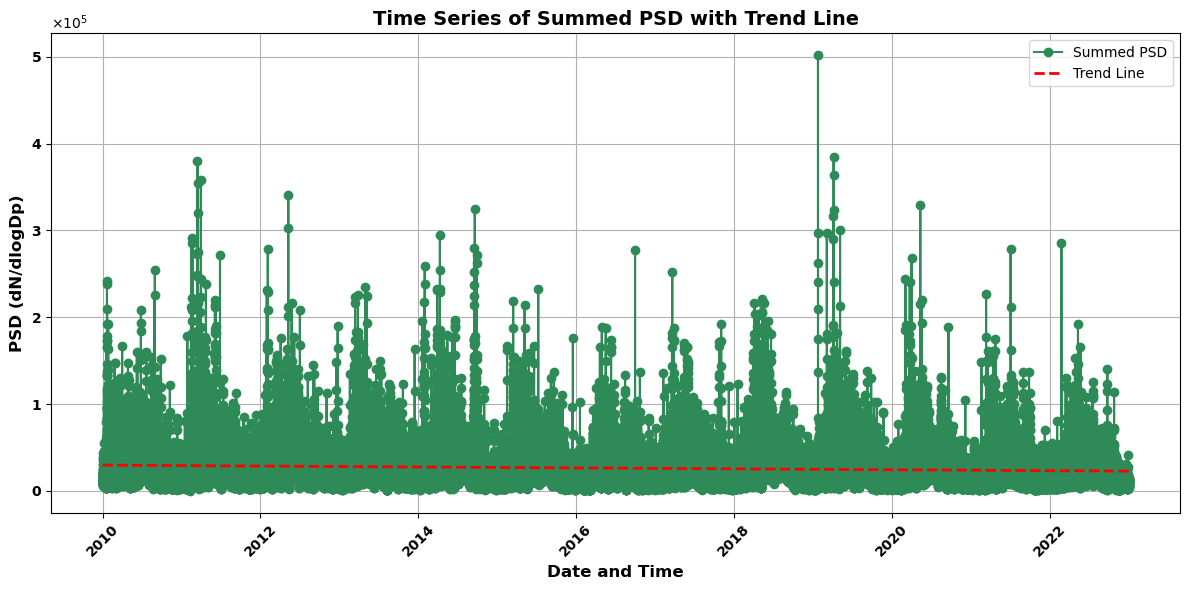

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/Users/touqeergill/Desktop/Hourly_Averages (PSD).xlsx'
data = pd.read_excel(file_path)

# Sum the values from columns B to AM for each row
data['Sum_PNC'] = data.iloc[:, 1:40].sum(axis=1)  # Columns B to AM are at index 1 to 39

# Convert the 'Date and Time' column to datetime if not already
data['datetime'] = pd.to_datetime(data['datetime'])

# Convert datetime to numerical values for regression
data['timestamp'] = data['datetime'].map(pd.Timestamp.timestamp)

# Perform linear regression (1st degree polynomial fit)
slope, intercept = np.polyfit(data['timestamp'], data['Sum_PNC'], 1)
trend_line = slope * data['timestamp'] + intercept

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Sum_PNC'], marker='o', linestyle='-', color='seagreen', label='Summed PSD')
plt.plot(data['datetime'], trend_line, color='red', linestyle='--', linewidth=2, label='Trend Line')  # Trend Line

plt.title('Time Series of Summed PSD with Trend Line', fontweight='bold', fontsize=14)
plt.xlabel('Date and Time', fontweight='bold', fontsize=12)
plt.ylabel('PSD (dN/dlogDp)', fontweight='bold', fontsize=12)
plt.grid(True)

# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Make x and y ticks bold and more prominent
plt.xticks(fontweight='bold', fontsize=10, rotation=45)
plt.yticks(fontweight='bold', fontsize=10)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()